In [18]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

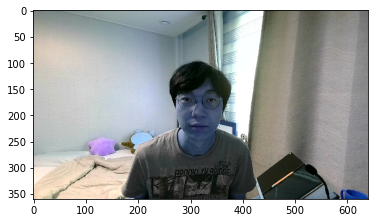

In [19]:
import os
my_image_path = "./camera_sticker/images/image.png"
img_bgr = cv2.imread(my_image_path)
img_bgr = cv2.resize(img_bgr, (640,360))
img_show = img_bgr.copy()
plt.imshow(img_bgr)
plt.show()

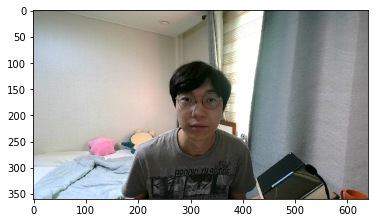

In [20]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

rectangles[[(259, 140) (366, 247)]]


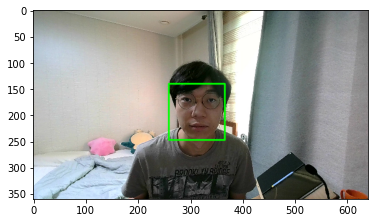

In [21]:
import dlib
detector_hog = dlib.get_frontal_face_detector()

dlib_rects = detector_hog(img_rgb, 1)
print(dlib_rects)

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    
    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2,
                  lineType=cv2.LINE_AA)
    
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [22]:
# wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2

model_path = "../../data/model/shape_predictor_68_face_landmarks.dat"
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


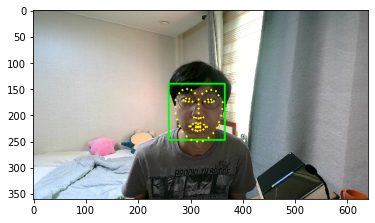

In [23]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0,255,255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [24]:
#좌표 확인
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # nose center index : 30
    x = landmark[30][0]
    y = landmark[30][1] - dlib_rect.width()//2
    w = dlib_rect.width()
    h = dlib_rect.height()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))
    
#코 중심 (316, 196)

(316, 196)
(x,y) : (316,142)
(w,h) : (108,108)


In [25]:
# 스티커 크기 조정
sticker_path = "./camera_sticker/images/king.png"
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

(108, 108, 3)


In [26]:
refined_x = x - w // 2  # left
refined_y = y - h       # top
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

# 여기서 음수가 나온다는 건, 스티커가 이미지 범위 밖으로 나간 것

(x,y) : (262,34)


In [27]:
if refined_y < 0 :
    img_sticker = img_sticker[-refined_y:]
    refined_y = 0
print (img_sticker.shape)
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(108, 108, 3)
(x,y) : (262,34)


In [28]:
img_sticker.shape[1] + refined_y

142

In [30]:
# 전체사진 100,200
# 시작점:끝점, 시작점:끝점

sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0],
                        refined_x:refined_x+img_sticker.shape[1]]

# 이미지 대체하는 지점
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+
         img_sticker.shape[1]] = \
    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)

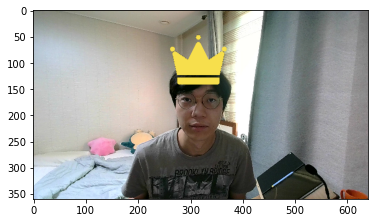

In [32]:
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0],
                       refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+
        img_sticker.shape[1]] = \
    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()